Amazon Alexa is a cloud-based voice service developed by Amazon that allows customers to interact with technology. There are currently over 40 million Alexa users around the world, so analyzing user sentiments about Alexa will be a good data science project.

The dataset I’m using for the task of sentiment analysis of Amazon Alexa reviews was collected from Kaggle. It contains data about ratings between 1 and 5, the date of reviews, and customer feedback on their experience with Alexa. So let’s import the necessary Python dataset and libraries that we need for this task:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\Amazon Alexa Reviews Sentiment Analysis using NLP\amazon_alexa.tsv", delimiter='\t')
print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


Let’s start by looking at some of the information in that data to see whether or not we need to change it:

In [2]:
print(data.describe())
print(data.isnull().sum())
print(data.columns)

            rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000
rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64
Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


The dataset’s rating column contains the ratings given by the users of Amazon Alexa on a scale of 1 to 5, where 5 is the best rating a user can give. So let’s look at the breakdown of ratings given to Amazon Alexa by its users:

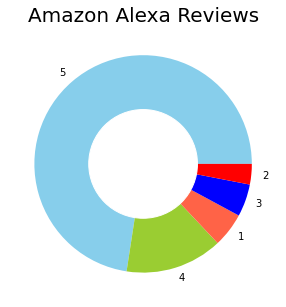

In [3]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews", fontsize=20)
plt.show()

From the above figure, we can see that most of the customers have rated Amazon Alexa including all its variants as 5. So it means that most of the customers are happy with Amazon Alexa

## Amazon Alexa Reviews Sentiment Analysis

Now let’s move on to the task of sentiment analysis of Alexa’s reviews. The verified_reviews column of the dataset contains all the reviews given by Amazon Alexa’s customers. So let’s add new columns to this data as positive, negative and neutral by calculating the sentiment scores of the reviews:

In [4]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["verified_reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["verified_reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["verified_reviews"]]
print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  Positive  \
0                                      Love my Echo!         1     0.692   
1                                          Loved it!         1     0.807   
2  Sometimes while playing a game, you can answer...         1     0.114   
3  I have had a lot of fun with this thing. My 4 ...         1     0.383   
4                                              Music         1     0.000   

   Negative  Neutral  
0     0.000    0.308  
1     0.000    0.193  
2     0.102    0.784  
3     0.000    0.617  
4     0.000    1.000  


Now let’s sum the sentiment scores for each column to understand what most of the customers of Amazon Alexa think about it:

In [5]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


The final output that we get is therefore neutral. This means that most users feel neutral about Amazon Alexa services. Now let’s see the sum of the sentiment scores for each column:

In [6]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1035.4579999999983
Negative:  96.79999999999995
Neutral:  1936.740999999996


So we can see that Positive and Neutral are above 1000 where Negative is below 100. So this means that most of the customers of Amazon Alexa are satisfied with its services.

## Summary

So this is how we can analyze the sentiments of Amazon Alexa reviews by using the Python programming language. There are currently over 40 million Alexa users around the world, so analyzing user sentiments about Alexa will be a good data science project.